In [2]:
%matplotlib inline
import json
import os.path
import nltk
from nltk.tag import pos_tag
import pprint
import pandas as pd
import time
from nltk.corpus import stopwords

In [3]:
# extract table from json
def tweettotable(input_tweets,input_table): #program does nothing as written
    tweets=[]
    with open(input_tweets) as f1:
        for line in f1:
            tweets.append(json.loads(line))
    if not os.path.isfile(input_table):
        f2 = open(input_table, 'w')
        for t in range(len(tweets)):
            if not ('retweeted_status' in tweets[t].keys()):
                ascii_text= ''.join([i if ord(i) < 128 else ' ' for i in tweets[t]['text']])
                f2.write('\t'.join([tweets[t]['created_at'], 
                                ascii_text.replace('\n','').replace('\r','').encode('ascii'),'\n']))    
    else:
        print 'the table file ',input_table,' already exists'

In [4]:
# first unzip the large json file in data folder
# this takes a few minutes
tweettotable('data/tweets_large.json','data/input_table.csv')

In [5]:
# create dataframe 
input_table='data/input_table.csv'
df=pd.read_csv(input_table,sep='\t',encoding='latin-1',header=None, names=['time','text','non'])
df.drop('non',axis=1,inplace=True)
df['one']=1
df['datetime']=df.time.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S',time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))

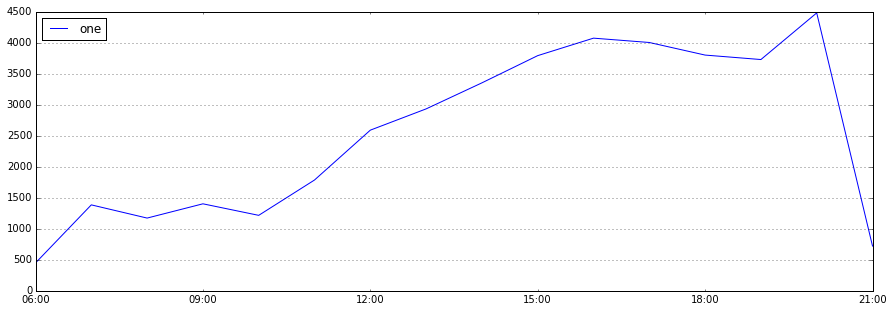

In [6]:
# resample for every hour
df.set_index(pd.DatetimeIndex(df.datetime),inplace=True)
df.resample('H',sum).plot(figsize=(15,5))

In [7]:
# remove rubish words
stops=['http','RT','@','#','!',':','.','-',',','//t','/but','one','\'s','(',')','?',';','&']
for stop in stops:
    df.text=df.text.str.replace(stop,'')
df['text']=df.text.str.lower()    
l=df.text.tolist()
text=' '.join(l)

In [8]:
# tokenize 
token_text= nltk.word_tokenize(text)

In [9]:
# remove stop words
stop=stopwords.words('english')
text_nonstop=[]
for word in token_text: # iterate over word_list
    if not (word in stop): 
        text_nonstop.append(word)    

In [10]:
freq=nltk.FreqDist(text_nonstop)

In [11]:
top=sorted(freq,key=freq.get,reverse=True)[:7]

In [12]:
for key in top:    
    df[key]= df.text.apply(lambda x: key in x)
df.drop(['.'],inplace=True)

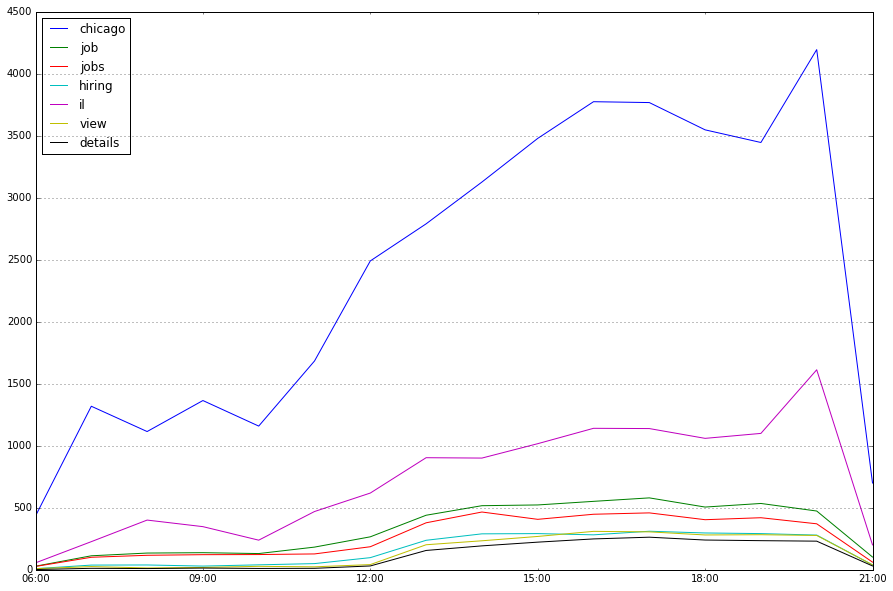

In [13]:
df[top].resample('H',sum).plot(figsize=(15,10))

In [14]:
df[top].resample('H',sum)

,chicago,job,jobs,hiring,il,view,details
2015-06-22 06:00:00,434,29,27,9,56,9,2
2015-06-22 07:00:00,1319,113,101,38,227,26,12
2015-06-22 08:00:00,1115,135,117,39,401,15,10
2015-06-22 09:00:00,1365,138,122,30,348,19,14
2015-06-22 10:00:00,1159,131,123,40,239,28,11
2015-06-22 11:00:00,1684,183,128,50,470,24,12
2015-06-22 12:00:00,2491,266,186,98,619,42,31
2015-06-22 13:00:00,2790,440,379,238,904,202,156
2015-06-22 14:00:00,3127,517,466,290,901,234,193
2015-06-22 15:00:00,3479,523,407,292,1017,269,223
